## <b> Import modules and ignore warnings

In [336]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import fdrcorrection
import warnings
warnings.filterwarnings("ignore")


## <b> Load and read amr data

In [337]:
amr = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/other_geneticcoordinates/resfinder_summary.csv', sep = '\t')
print("Shape of the dataframe is", amr.shape)

print('-------------------------------------------')
print(amr.columns)
print('-------------------------------------------')
amr.head()

Shape of the dataframe is (950, 185)
-------------------------------------------
Index(['#FILE', 'NUM_FOUND', 'Unnamed: 2', 'ARR-3_4', 'aac(2')-IIa_1',
       'aac(3)-IIa_1', 'aac(3)-IId_1', 'aac(3)-IVa_1', 'aac(3)-VIa_2',
       'aac(6')-IIc_1',
       ...
       'tet(B)_1', 'tet(B)_2', 'tet(C)_2', 'tet(C)_3', 'tet(D)_1', 'tet(M)_4',
       'tet(M)_5', 'tet(M)_8', 'tet(X)_1', 'tet(X)_3'],
      dtype='object', length=185)
-------------------------------------------


,#FILE,NUM_FOUND,Unnamed: 2,ARR-3_4,aac(2')-IIa_1,aac(3)-IIa_1,aac(3)-IId_1,aac(3)-IVa_1,aac(3)-VIa_2,aac(6')-IIc_1,...,tet(B)_1,tet(B)_2,tet(C)_2,tet(C)_3,tet(D)_1,tet(M)_4,tet(M)_5,tet(M)_8,tet(X)_1,tet(X)_3
0,/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_syst...,2,NaN,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
1,/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_syst...,3,NaN,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_syst...,3,NaN,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_syst...,2,NaN,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4,/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_syst...,4,NaN,.,.,.,.,.,.,.,...,100.00,.,.,.,.,.,.,.,.,.


In [338]:
def clean_resfinder_summary(df):
    df.drop("Unnamed: 2",axis=1,inplace=True)
    cols=list(df.columns)
    del cols[:2]
    
    for i in cols:
        df[i]=df[i].astype(str)
        df[i]=df[i].apply(lambda x: '1' if re.search(r'\d+\.\d+', x) else '0' )
        df[i]=df[i].astype(float)
    
    df.rename(columns={'#FILE': 'Strain', 'NUM_FOUND': 'GENES_FOUND'}, inplace=True)
    df['Strain'] = df['Strain'].str.replace(r'\.tab', '') 
    df['Strain'] = df['Strain'].str.replace(r'/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_systems_clean/set1/other_geneticcoordinates/resfinder/', '')

In [339]:
clean_resfinder_summary(amr)

In [340]:
#amr = amr.set_index('Strain')
amr  = amr.drop(['GENES_FOUND'], axis  = 1)

In [341]:
amr.head()

,Strain,ARR-3_4,aac(2')-IIa_1,aac(3)-IIa_1,aac(3)-IId_1,aac(3)-IVa_1,aac(3)-VIa_2,aac(6')-IIc_1,aac(6')-Ib-cr_1,aac(6')-Ib_1,...,tet(B)_1,tet(B)_2,tet(C)_2,tet(C)_3,tet(D)_1,tet(M)_4,tet(M)_5,tet(M)_8,tet(X)_1,tet(X)_3
0,ST000100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ST000100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ST000100090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ST000100092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ST000100113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




## <b> Load and read toxin data

In [342]:
toxin = pd.read_csv('hits.csv')
print("Shape of the toxin dataframe is", toxin.shape)
print('-------------------------------------------')
print(toxin.columns)
print('-------------------------------------------')
toxin.head()

Shape of the toxin dataframe is (950, 170)
-------------------------------------------
Index(['Strain', '1H-CbtA_toxin', '2H-Cpta_toxin', '3H-Polyketide_cyc2',
       '4H-Fic', '5H-GNAT_acetyltran', '6H-GNAT_acetyltran', '7H-GnsAB_toxin',
       '8H-Toxin_YhaV', '9H-YdaT_toxin',
       ...
       '160H-Zeta_toxin', '161H-CbtA_toxin', '162H-Couple_hipA', '163H-ANT',
       '164H-Zeta_toxin', '165H-HipA_C', '166H-Gp49', '167H-DUF4258',
       '168H-PIN', '169H-PemK_toxin'],
      dtype='object', length=170)
-------------------------------------------


,Strain,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
0,ST001670050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ST006480109,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ST000730234,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,ST000580141,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ST000380050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [343]:
#toxin  = toxin.set_index('Strain')

In [344]:
toxin.head()

,Strain,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
0,ST001670050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ST006480109,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ST000730234,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,ST000580141,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ST000380050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## <b> Fisher exact test

In [345]:
amr = amr.set_index('Strain')
amr.head()

,ARR-3_4,aac(2')-IIa_1,aac(3)-IIa_1,aac(3)-IId_1,aac(3)-IVa_1,aac(3)-VIa_2,aac(6')-IIc_1,aac(6')-Ib-cr_1,aac(6')-Ib_1,aac(6')-Il_1,...,tet(B)_1,tet(B)_2,tet(C)_2,tet(C)_3,tet(D)_1,tet(M)_4,tet(M)_5,tet(M)_8,tet(X)_1,tet(X)_3
Strain,,,,,,,,,,,,,,,,,,,,,
ST000100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ST000100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ST000100090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ST000100092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ST000100113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


First,merges two CSV files (one with AMR gene data and one with toxin gene data) using the 'Strain' column as the common identifier.

Next, the code sets the significance level (alpha) for statistical tests to 0.05.

Then, initializes an empty dictionary called 'co_occurrence_dict' to store the co-occurring AMR genes for each toxin gene.

The code then iterates through each toxin gene and performs the following steps:

Counts the number of strains that have the toxin gene.
Iterates through each AMR gene and counts the number of strains that have both the AMR gene and the toxin gene.
Performs a Fisher's exact test to calculate the p-value for the observed co-occurrence of the AMR and toxin genes.
Adjusts the p-value for multiple testing using the false discovery rate (FDR) method.
If the adjusted p-value is significant (less than alpha), adds the AMR gene to the list of co-occurring AMR genes for this toxin gene.
Stores the list of co-occurring AMR genes in the 'co_occurrence_dict' dictionary under the corresponding toxin gene key.
Finally, the code returns the 'co_occurrence_dict' dictionary, which contains the co-occurring AMR genes for each toxin gene along with their statistical significance.

In [346]:
merged_df = pd.merge(amr, toxin, on='Strain', how = 'left' )

In [347]:
print(merged_df.shape)
merged_df.head()

(950, 352)


,Strain,ARR-3_4,aac(2')-IIa_1,aac(3)-IIa_1,aac(3)-IId_1,aac(3)-IVa_1,aac(3)-VIa_2,aac(6')-IIc_1,aac(6')-Ib-cr_1,aac(6')-Ib_1,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
0,ST000100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,ST000100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,ST000100090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,ST000100092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,ST000100113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
toxin = toxin.set_index('Strain')

In [349]:
# set the significance level
alpha = 0.01

# create a dictionary to store the co-occurring AMR genes for each toxin gene
co_occurrence_dict = {}

In [350]:
# iterate through each toxin gene
for toxin_gene in toxin.columns:
    # create a list to store the co-occurring AMR genes for this toxin gene
    co_amr_genes = []
    # count the number of strains that have the toxin gene
    toxin_count = (toxin[toxin_gene] == 1).sum()
    
    # iterate through each AMR gene
    for amr_gene in amr.columns:
        # count the number of strains that have both the AMR gene and the toxin gene
        co_count = ((merged_df[amr_gene] == 1) & (merged_df[toxin_gene] == 1)).sum()
        
        # perform Fisher's exact test to calculate the p-value
        # for the hypothesis that the occurrence of the AMR gene is greater in strains with the toxin gene
        p_value = fisher_exact([[co_count, toxin_count - co_count], [(amr[amr_gene] == 1).sum() - co_count, ((merged_df[amr_gene] != 1) & (merged_df[toxin_gene] == 1)).sum()]], alternative='greater')[1]
        
        # adjust the p-value for multiple testing using the false discovery rate (FDR) method
        p_value_adj = fdrcorrection([p_value], alpha=alpha)[1][0]
        
        # if the adjusted p-value is significant, add the AMR gene to the list for this toxin gene
        if p_value_adj < alpha:
            co_amr_genes.append(amr_gene)
    
    # store the list of co-occurring AMR genes in the dictionary
    co_occurrence_dict[toxin_gene] = co_amr_genes


In [351]:
#co_occurrence_dict

In [352]:


# Create an empty dataframe with columns for toxins and AMR genes
df = pd.DataFrame(columns=['toxins', 'amr genes'])

# Loop through each key-value pair in your dictionary
for toxin, amr_genes in co_occurrence_dict.items():
    # Create a new row with the toxin in the first column and a list of AMR genes in the second column
    new_row = {'toxins': toxin, 'amr genes': amr_genes}
    # Add the new row to the dataframe
    df = df.append(new_row, ignore_index=True)
    
# Display the resulting dataframe
df.head()


,toxins,amr genes
0,1H-CbtA_toxin,"[aph(3')-III_1, blaCTX-M-1_1]"
1,2H-Cpta_toxin,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I..."
2,3H-Polyketide_cyc2,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I..."
3,4H-Fic,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I..."
4,5H-GNAT_acetyltran,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I..."


In [353]:
df.head()

,toxins,amr genes
0,1H-CbtA_toxin,"[aph(3')-III_1, blaCTX-M-1_1]"
1,2H-Cpta_toxin,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I..."
2,3H-Polyketide_cyc2,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I..."
3,4H-Fic,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I..."
4,5H-GNAT_acetyltran,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I..."


In [354]:
def find_resistance(genes, prefix_list):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(prefix_list):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['aminoglycoside_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('aac', 'aad', 'ant', 'aph', 'apm', 'arm', 'npm', 'rmt', 'spc', 'sph', 'str', 'rmt')))
df['betalactam_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('bla')))
df['refampicin_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('ARR')))
df['phenicol_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('cat', 'cml')))
df['trimethoprim_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('cat', 'cml', 'flo')))
df['fosfomycin_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('cat', 'cml', 'flo')))
df['macrolide_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('ere', 'erm', 'lnu', 'mdf', 'mef', 'mph')))
df['colistin_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('mcr')))
df['quinolone_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('oqx', 'qep', 'qnr')))
df['sulphonamide_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('sul')))
df['tetracycline_resistance'] = df['amr genes'].apply(lambda x: find_resistance(x, ('tet')))


def find_aminoglycoside_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('aac', 'aad', 'ant', 'aph', 'apm', 'arm', 'npm', 'rmt', 'spc', 'sph', 'str', 'rmt')):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['aminoglycoside_resistance'] = df['amr genes'].apply(find_aminoglycoside_resistance)

def find_betalactam_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('bla')):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['betalactam_resistance'] = df['amr genes'].apply(find_betalactam_resistance)

def find_refampicin_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('ARR')):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['refampicin_resistance'] = df['amr genes'].apply(find_refampicin_resistance)

def find_phenicol_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('cat', 'cml')):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['phenicol_resistance'] = df['amr genes'].apply(find_phenicol_resistance)

def find_trimethoprim_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('cat', 'cml', 'flo')):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['trimethoprim_resistance'] = df['amr genes'].apply(find_trimethoprim_resistance)

def find_fosfomycin_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('cat', 'cml', 'flo', )):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['fosfomycin_resistance'] = df['amr genes'].apply(find_fosfomycin_resistance)

def find_macrolide_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('ere', 'erm', 'lnu', 'mdf', 'mef', 'mph' )):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['macrolide_resistance'] = df['amr genes'].apply(find_macrolide_resistance)

def find_colistin_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('mcr')):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['colistin_resistance'] = df['amr genes'].apply(find_colistin_resistance)

def find_quinolone_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('oqx', 'qep', 'qnr')):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['quinolone_resistance'] = df['amr genes'].apply(find_quinolone_resistance)

def find_sulphonamide_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('sul')):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['sulphonamide_resistance'] = df['amr genes'].apply(find_sulphonamide_resistance)

def find_tetracycline_resistance(genes):
    matching_genes = []
    for gene in genes:
        if gene.strip().startswith(('sul')):
            matching_genes.append(gene.strip())
    return matching_genes if len(matching_genes) > 0 else None

df['tetracycline_resistance'] = df['amr genes'].apply(find_tetracycline_resistance)

In [355]:
resistance_mechanisms = ['aminoglycoside_resistance', 'betalactam_resistance', 'refampicin_resistance',
                        'phenicol_resistance','trimethoprim_resistance', 'fosfomycin_resistance',
                         'macrolide_resistance', 'colistin_resistance', 'quinolone_resistance',
                         'sulphonamide_resistance', 'tetracycline_resistance' ]

for mechanism in resistance_mechanisms:
    df['Count_' + mechanism] = df[mechanism].apply(lambda x: len(x) if x else 0)


In [356]:
df.shape

(169, 24)

In [357]:
df.head()

,toxins,amr genes,aminoglycoside_resistance,betalactam_resistance,refampicin_resistance,phenicol_resistance,trimethoprim_resistance,fosfomycin_resistance,macrolide_resistance,colistin_resistance,...,Count_betalactam_resistance,Count_refampicin_resistance,Count_phenicol_resistance,Count_trimethoprim_resistance,Count_fosfomycin_resistance,Count_macrolide_resistance,Count_colistin_resistance,Count_quinolone_resistance,Count_sulphonamide_resistance,Count_tetracycline_resistance
0,1H-CbtA_toxin,"[aph(3')-III_1, blaCTX-M-1_1]",[aph(3')-III_1],[blaCTX-M-1_1],None,None,None,None,None,None,...,1,0,0,0,0,0,0,0,0,0
1,2H-Cpta_toxin,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I...","[aac(3)-IIa_1, aac(3)-IId_1, aac(3)-IVa_1, aac...","[blaCMY-2_1, blaCMY-42_1, blaCMY-6_1, blaCTX-M...",[ARR-3_4],"[catA1_1, catB3_2, cmlA1_1]","[catA1_1, catB3_2, cmlA1_1, floR_2]","[catA1_1, catB3_2, cmlA1_1, floR_2]","[ere(A)_2, erm(B)_18, lnu(F)_1, mdf(A)_1, mef(...","[mcr-1.1_1, mcr-9_1]",...,22,1,3,4,4,6,2,4,4,4
2,3H-Polyketide_cyc2,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I...","[aac(3)-IIa_1, aac(3)-IId_1, aac(3)-IVa_1, aac...","[blaCMY-2_1, blaCMY-42_1, blaCMY-6_1, blaCTX-M...",[ARR-3_4],"[catA1_1, catB3_2, cmlA1_1]","[catA1_1, catB3_2, cmlA1_1, floR_2]","[catA1_1, catB3_2, cmlA1_1, floR_2]","[ere(A)_2, erm(B)_18, lnu(F)_1, mdf(A)_1, mef(...","[mcr-1.1_1, mcr-9_1]",...,22,1,3,4,4,6,2,4,4,4
3,4H-Fic,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I...","[aac(3)-IIa_1, aac(3)-IId_1, aac(3)-IVa_1, aac...","[blaCMY-2_1, blaCMY-42_1, blaCMY-6_1, blaCTX-M...",[ARR-3_4],"[catA1_1, catB3_2, cmlA1_1]","[catA1_1, catB3_2, cmlA1_1, floR_2]","[catA1_1, catB3_2, cmlA1_1, floR_2]","[ere(A)_2, erm(B)_18, lnu(F)_1, mdf(A)_1, mef(...","[mcr-1.1_1, mcr-9_1]",...,22,1,3,4,4,6,2,4,4,4
4,5H-GNAT_acetyltran,"[ARR-3_4, aac(3)-IIa_1, aac(3)-IId_1, aac(3)-I...","[aac(3)-IIa_1, aac(3)-IId_1, aac(3)-IVa_1, aac...","[blaCMY-2_1, blaCMY-42_1, blaCMY-6_1, blaCTX-M...",[ARR-3_4],"[catA1_1, catB3_2, cmlA1_1]","[catA1_1, catB3_2, cmlA1_1, floR_2]","[catA1_1, catB3_2, cmlA1_1, floR_2]","[ere(A)_2, erm(B)_18, lnu(F)_1, mdf(A)_1, mef(...","[mcr-1.1_1, mcr-9_1]",...,22,1,3,4,4,6,2,4,4,4


In [358]:
df.columns

Index(['toxins', 'amr genes', 'aminoglycoside_resistance',
       'betalactam_resistance', 'refampicin_resistance', 'phenicol_resistance',
       'trimethoprim_resistance', 'fosfomycin_resistance',
       'macrolide_resistance', 'colistin_resistance', 'quinolone_resistance',
       'sulphonamide_resistance', 'tetracycline_resistance',
       'Count_aminoglycoside_resistance', 'Count_betalactam_resistance',
       'Count_refampicin_resistance', 'Count_phenicol_resistance',
       'Count_trimethoprim_resistance', 'Count_fosfomycin_resistance',
       'Count_macrolide_resistance', 'Count_colistin_resistance',
       'Count_quinolone_resistance', 'Count_sulphonamide_resistance',
       'Count_tetracycline_resistance'],
      dtype='object')

In [359]:
df['Count_total_amr_genes'] = df['amr genes'].apply(lambda x: len(x) if x else 0)

In [360]:
df.dtypes

toxins                             object
amr genes                          object
aminoglycoside_resistance          object
betalactam_resistance              object
refampicin_resistance              object
phenicol_resistance                object
trimethoprim_resistance            object
fosfomycin_resistance              object
macrolide_resistance               object
colistin_resistance                object
quinolone_resistance               object
sulphonamide_resistance            object
tetracycline_resistance            object
Count_aminoglycoside_resistance     int64
Count_betalactam_resistance         int64
Count_refampicin_resistance         int64
Count_phenicol_resistance           int64
Count_trimethoprim_resistance       int64
Count_fosfomycin_resistance         int64
Count_macrolide_resistance          int64
Count_colistin_resistance           int64
Count_quinolone_resistance          int64
Count_sulphonamide_resistance       int64
Count_tetracycline_resistance     

In [361]:
df.to_csv('cooccur_resfinder', index = None)

In [362]:
df_test = df[['toxins', 'Count_aminoglycoside_resistance', 'Count_betalactam_resistance',
       'Count_refampicin_resistance', 'Count_phenicol_resistance',
       'Count_trimethoprim_resistance', 'Count_fosfomycin_resistance',
       'Count_macrolide_resistance', 'Count_colistin_resistance',
       'Count_quinolone_resistance', 'Count_sulphonamide_resistance',
       'Count_tetracycline_resistance', 'Count_total_amr_genes']]

In [363]:
df_test.head()

,toxins,Count_aminoglycoside_resistance,Count_betalactam_resistance,Count_refampicin_resistance,Count_phenicol_resistance,Count_trimethoprim_resistance,Count_fosfomycin_resistance,Count_macrolide_resistance,Count_colistin_resistance,Count_quinolone_resistance,Count_sulphonamide_resistance,Count_tetracycline_resistance,Count_total_amr_genes
0,1H-CbtA_toxin,1,1,0,0,0,0,0,0,0,0,0,2
1,2H-Cpta_toxin,20,22,1,3,4,4,6,2,4,4,4,78
2,3H-Polyketide_cyc2,20,22,1,3,4,4,6,2,4,4,4,78
3,4H-Fic,20,22,1,3,4,4,6,2,4,4,4,78
4,5H-GNAT_acetyltran,20,22,1,3,4,4,6,2,4,4,4,78


In [364]:
df_test.columns

Index(['toxins', 'Count_aminoglycoside_resistance',
       'Count_betalactam_resistance', 'Count_refampicin_resistance',
       'Count_phenicol_resistance', 'Count_trimethoprim_resistance',
       'Count_fosfomycin_resistance', 'Count_macrolide_resistance',
       'Count_colistin_resistance', 'Count_quinolone_resistance',
       'Count_sulphonamide_resistance', 'Count_tetracycline_resistance',
       'Count_total_amr_genes'],
      dtype='object')

In [365]:
filtered_df.columns

Index(['toxins', 'Count_aminoglycoside_resistance',
       'Count_betalactam_resistance', 'Count_refampicin_resistance',
       'Count_phenicol_resistance', 'Count_trimethoprim_resistance',
       'Count_fosfomycin_resistance', 'Count_macrolide_resistance',
       'Count_colistin_resistance', 'Count_quinolone_resistance',
       'Count_sulphonamide_resistance', 'Count_tetracycline_resistance',
       'Count_total_amr_genes'],
      dtype='object')

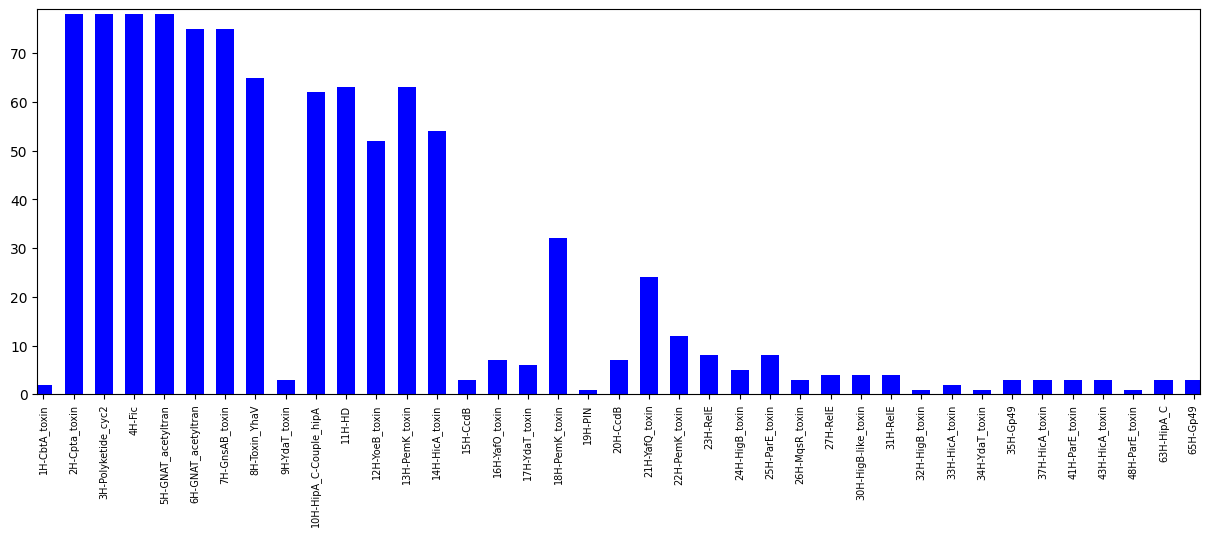

In [376]:
# Define your threshold
threshold = 1

filtered_df = df_test[df_test['Count_total_amr_genes'] >=1]
fig, ax = plt.subplots(figsize = (15,5))

# Set the width of each bar
width = 0.6

# Set the spacing between bars
spacing = 0.2

# filter out rows with zero values
ax.bar(filtered_df['toxins'], filtered_df['Count_total_amr_genes'], align='center', width=width, color='blue')

# Set the positions of the x-ticks and labels
x_pos = np.arange(len(filtered_df['toxins']))
ax.set_xticks(x_pos)
ax.set_xticklabels(filtered_df['toxins'], rotation=90, fontsize=7)

# Set the limits of the y-axis
ax.set_ylim([0, max(filtered_df['Count_total_amr_genes']) + 1])

# Add space between the bars
ax.set_xlim([x_pos[0] - spacing, x_pos[-1] + spacing])

# Show the plot
plt.show()



he code fisher_exact([[co_count, toxin_count - co_count], [(amr[amr_gene] == 1).sum() - co_count, ((merged_df[amr_gene] != 1) & (merged_df[toxin_gene] == 1)).sum()]], alternative='greater')[1] computes the p-value of a one-sided Fisher's exact test for the hypothesis that there is a greater association between the toxin and the AMR gene than expected by chance. Here's a manual breakdown of the steps:

co_count: The number of samples that have both the toxin and the AMR gene.
toxin_count: The total number of samples that have the toxin.
amr[amr_gene] == 1: A boolean mask that is True for samples that have the AMR gene.
(amr[amr_gene] == 1).sum(): The number of samples that have the AMR gene.
(amr[amr_gene] == 1).sum() - co_count: The number of samples that have the AMR gene but not the toxin.
merged_df[amr_gene] != 1: A boolean mask that is True for samples that do not have the AMR gene.
merged_df[toxin_gene] == 1: A boolean mask that is True for samples that have the toxin.
((merged_df[amr_gene] != 1) & (merged_df[toxin_gene] == 1)): A boolean mask that is True for samples that have the toxin but not the AMR gene.
((merged_df[amr_gene] != 1) & (merged_df[toxin_gene] == 1)).sum(): The number of samples that have the toxin but not the AMR gene.
[[co_count, toxin_count - co_count], [(amr[amr_gene] == 1).sum() - co_count, ((merged_df[amr_gene] != 1) & (merged_df[toxin_gene] == 1)).sum()]]: A 2x2 contingency table that shows the counts of samples that have both the toxin and the AMR gene, the toxin but not the AMR gene, the AMR gene but not the toxin, and neither the toxin nor the AMR gene.
fisher_exact(): A function that computes the p-value of a Fisher's exact test for the contingency table.
alternative='greater': A parameter that specifies that the p-value should be calculated for the one-sided hypothesis that there is a greater association between the toxin and the AMR gene than expected by chance.
fisher_exact(...)[1]: The second element of the output of fisher_exact(), which is the p-value of the test.

## <b> plasmid finder

In [378]:
p = pd.read_csv('cooccur_plasmids')
integ = pd.read_csv('cooccur_integrons')
trans = pd.read_csv('cooccur_transposons')
vfdb = pd.read_csv('cooccur_vfdb')
res = pd.read_csv('cooccur_resfinder')

In [402]:
#res.head()
#p.head()
#vfdb.head()
#integ.head()
trans.head()

,toxins,transposons,Count_transposons
0,1H-CbtA_toxin,[],0
1,2H-Cpta_toxin,"['Tn5393', 'Tn1721', 'Tn1000', 'Tn6196', 'Tn60...",27
2,3H-Polyketide_cyc2,"['Tn5393', 'Tn1721', 'Tn1000', 'Tn6196', 'Tn60...",27
3,4H-Fic,"['Tn5393', 'Tn1721', 'Tn1000', 'Tn6196', 'Tn60...",27
4,5H-GNAT_acetyltran,"['Tn5393', 'Tn1721', 'Tn1000', 'Tn6196', 'Tn60...",27


In [380]:
res.columns

Index(['toxins', 'amr genes', 'aminoglycoside_resistance',
       'betalactam_resistance', 'refampicin_resistance', 'phenicol_resistance',
       'trimethoprim_resistance', 'fosfomycin_resistance',
       'macrolide_resistance', 'colistin_resistance', 'quinolone_resistance',
       'sulphonamide_resistance', 'tetracycline_resistance',
       'Count_aminoglycoside_resistance', 'Count_betalactam_resistance',
       'Count_refampicin_resistance', 'Count_phenicol_resistance',
       'Count_trimethoprim_resistance', 'Count_fosfomycin_resistance',
       'Count_macrolide_resistance', 'Count_colistin_resistance',
       'Count_quinolone_resistance', 'Count_sulphonamide_resistance',
       'Count_tetracycline_resistance', 'Count_total_amr_genes'],
      dtype='object')

In [403]:
res = res[['toxins', 'Count_total_amr_genes']]
p = p[['toxins', 'Count_plasmids']]
vfdb = vfdb[['toxins', 'Count_virulence_genes']]
integ = integ[['toxins', 'Count_integrons']]
trans = trans[['toxins', 'Count_transposons']]


In [405]:
temp= res.merge(p,on='toxins', how = 'left')
temp1 = temp.merge(vfdb,on='toxins', how = 'left')
temp2 = temp1.merge(integ,on='toxins', how = 'left')
temp3 = temp2.merge(trans,on='toxins', how = 'left')

In [407]:
temp3.head()

,toxins,Count_total_amr_genes,Count_plasmids,Count_virulence_genes,Count_integrons,Count_transposons
0,1H-CbtA_toxin,2,0,85,0,0
1,2H-Cpta_toxin,78,28,304,2,27
2,3H-Polyketide_cyc2,78,28,304,2,27
3,4H-Fic,78,28,304,2,27
4,5H-GNAT_acetyltran,78,28,291,2,27


In [417]:
final_df = temp3.copy()

In [418]:
temp3['Count_transposons'].value_counts()

0     143
1      10
27      5
24      3
20      2
2       2
23      1
18      1
9       1
5       1
Name: Count_transposons, dtype: int64

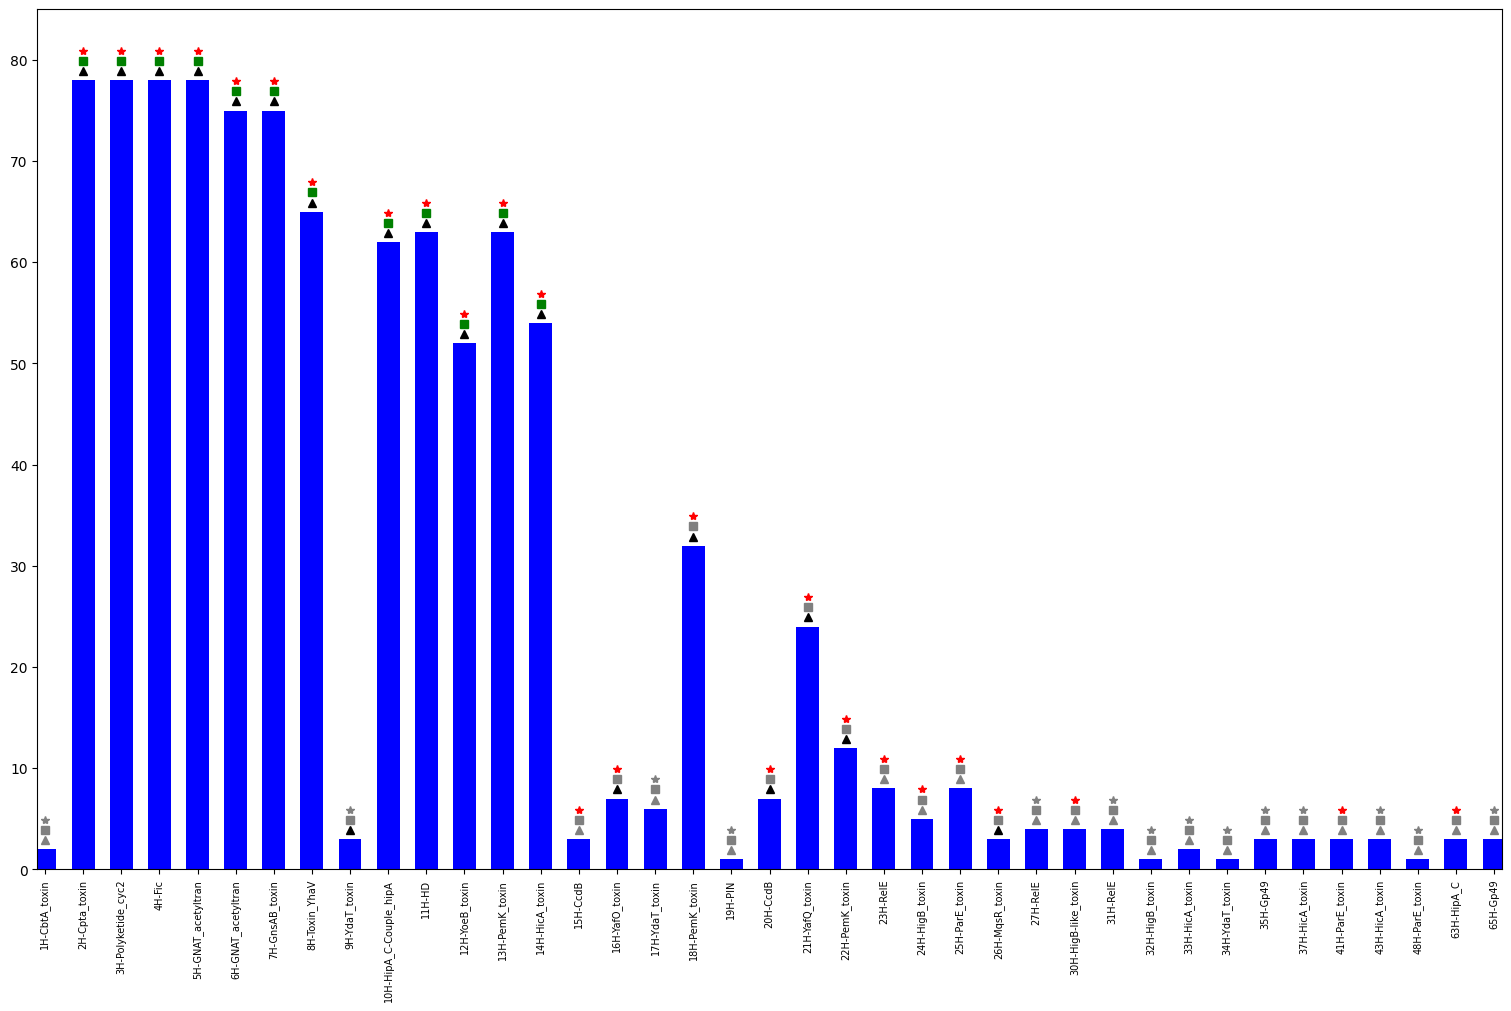

In [484]:
# Define your threshold
threshold = 1

# Filter out rows with Count_total_amr_genes below threshold
filtered_df = final_df[final_df['Count_total_amr_genes'] >= threshold]

fig, ax = plt.subplots(figsize=(15,10), constrained_layout=True)

# Set the width of each bar
width = 0.6

# Set the spacing between bars
spacing = 0.2

# Plot the filtered data
barplot = ax.bar(filtered_df['toxins'], filtered_df['Count_total_amr_genes'], align='center', width=width, color='blue')

# Add triangles to bars where other column > 0
#for i, bar in enumerate(barplot):
    #if filtered_df.iloc[i]['Count_plasmids'] > 0:
        #ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 0.9, '^', color='black')
    #if filtered_df.iloc[i]['Count_integrons'] > 0:
        #ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 1.9, 's', color='red')
    #if filtered_df.iloc[i]['Count_transposons'] > 0:
        #ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 2.9, 's', color='red')

# Add triangles to bars where other column > 0
for i, bar in enumerate(barplot):
    if filtered_df.iloc[i]['Count_plasmids'] > 0:
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 0.9, '^', color='black')
    else:
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 0.9, '^', color='grey')
        
    if filtered_df.iloc[i]['Count_integrons'] > 0:
        marker_color = 'green'
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 1.9, 's', color=marker_color)
    else:
        marker_color = 'grey'
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 1.9, 's', color=marker_color)
    if filtered_df.iloc[i]['Count_transposons'] > 0:
        marker_color = 'red'
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 2.9, '*', color=marker_color)
    else:
        marker_color = 'grey'
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 2.9, '*', color=marker_color)
        
# Set the positions of the x-ticks and labels
x_pos = np.arange(len(filtered_df['toxins']))
ax.set_xticks(x_pos)
ax.set_xticklabels(filtered_df['toxins'], rotation=90, fontsize=7)

# Set the limits of the y-axis
ax.set_ylim([0, max(filtered_df['Count_total_amr_genes']) + 7])

# Add space between the bars
ax.set_xlim([x_pos[0] - spacing, x_pos[-1] + spacing])

# Show the plot
plt.show()

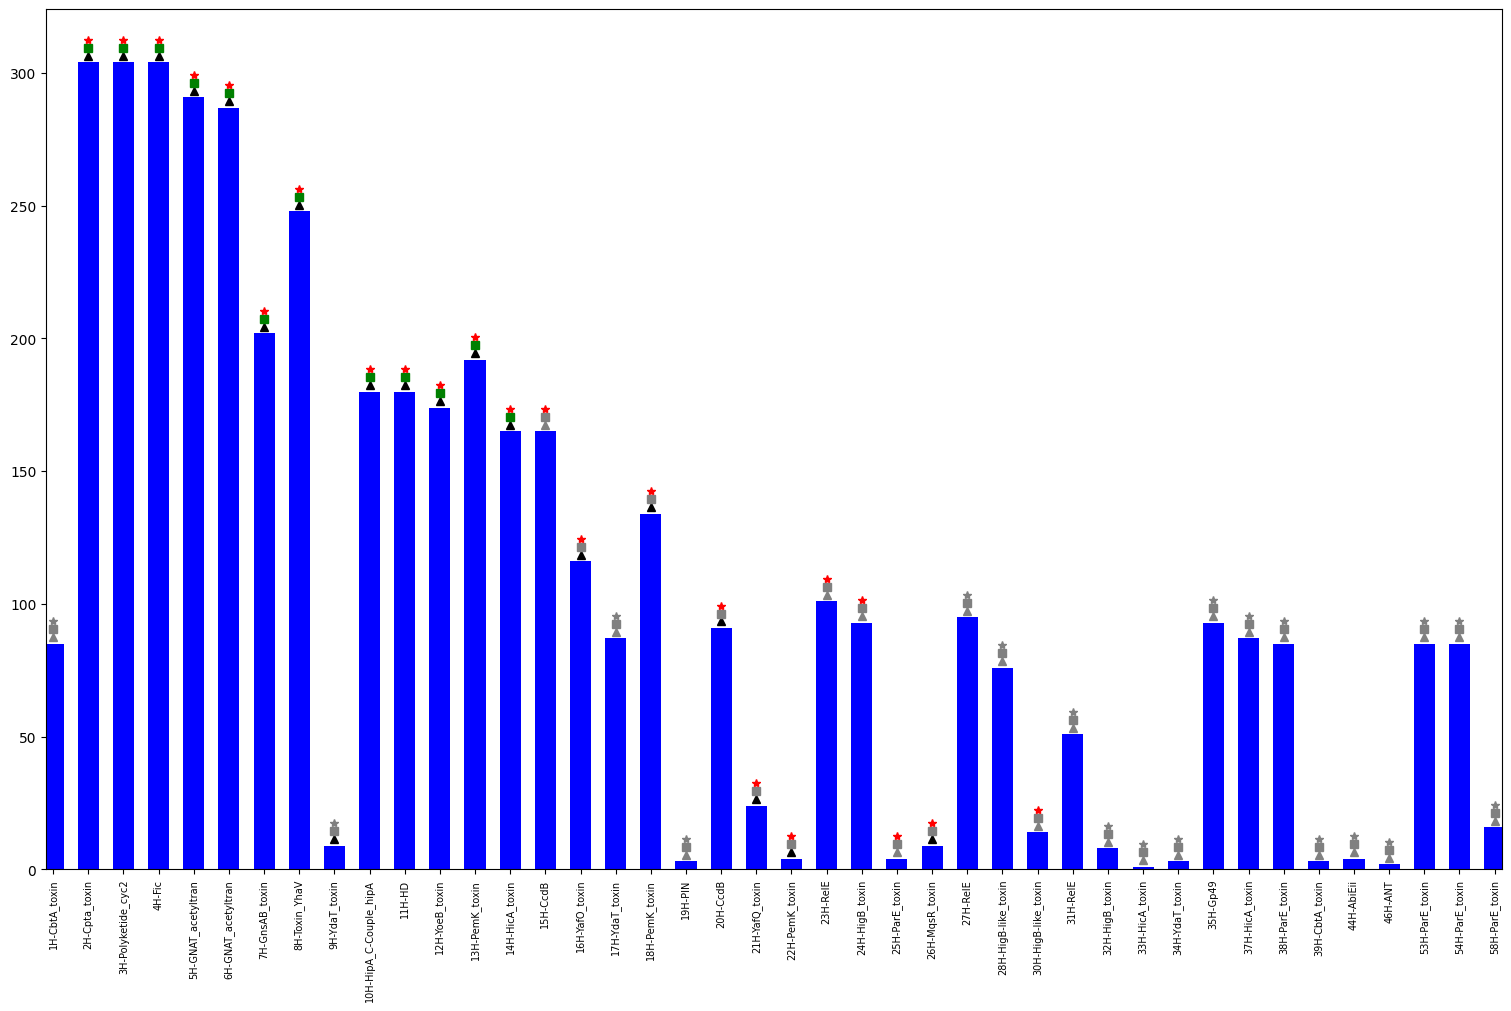

In [487]:
# Define your threshold
threshold = 1

# Filter out rows with Count_total_amr_genes below threshold
filtered_df = final_df[final_df['Count_virulence_genes'] >= threshold]

fig, ax = plt.subplots(figsize=(15,10), constrained_layout=True)

# Set the width of each bar
width = 0.6

# Set the spacing between bars
spacing = 0.2

# Plot the filtered data
barplot = ax.bar(filtered_df['toxins'], filtered_df['Count_virulence_genes'], align='center', width=width, color='blue')

# Add triangles to bars where other column > 0
#for i, bar in enumerate(barplot):
    #if filtered_df.iloc[i]['Count_plasmids'] > 0:
        #ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 0.9, '^', color='black')
    #if filtered_df.iloc[i]['Count_integrons'] > 0:
        #ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 1.9, 's', color='red')
    #if filtered_df.iloc[i]['Count_transposons'] > 0:
        #ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_total_amr_genes'] + 2.9, 's', color='red')

# Add triangles to bars where other column > 0
for i, bar in enumerate(barplot):
    if filtered_df.iloc[i]['Count_plasmids'] > 0:
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_virulence_genes'] + 2.4, '^', color='black')
    else:
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_virulence_genes'] + 2.4, '^', color='grey')
        
    if filtered_df.iloc[i]['Count_integrons'] > 0:
        marker_color = 'green'
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_virulence_genes'] + 5.4, 's', color=marker_color)
    else:
        marker_color = 'grey'
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_virulence_genes'] + 5.4, 's', color=marker_color)
    if filtered_df.iloc[i]['Count_transposons'] > 0:
        marker_color = 'red'
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_virulence_genes'] + 8.4, '*', color=marker_color)
    else:
        marker_color = 'grey'
        ax.plot(bar.get_x() + bar.get_width()/2, filtered_df.iloc[i]['Count_virulence_genes'] + 8.4, '*', color=marker_color)
        
# Set the positions of the x-ticks and labels
x_pos = np.arange(len(filtered_df['toxins']))
ax.set_xticks(x_pos)
ax.set_xticklabels(filtered_df['toxins'], rotation=90, fontsize=7)

# Set the limits of the y-axis
ax.set_ylim([0, max(filtered_df['Count_virulence_genes']) + 20])

# Add space between the bars
ax.set_xlim([x_pos[0] - spacing, x_pos[-1] + spacing])

# Show the plot
plt.show()
